# Image Classification Test

## Packages

In [1]:
from keras.applications.vgg16 import VGG16
from keras.applications import vgg16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from keras.models import Model
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model

from tensorflow.keras.preprocessing import image
import tensorflow as tf
import tensorflow_hub as hub
from six.moves.urllib.request import urlopen

from os.path import join

import numpy as np
from PIL import Image, ImageOps
import os
import sys
import cv2
from google.colab.patches import cv2_imshow
from os import listdir
from os.path import isfile, join

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import cKDTree
from skimage.feature import plot_matches
from skimage.measure import ransac
from skimage.transform import AffineTransform
from six import BytesIO

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Funcs

#### Load Image

In [3]:
def load_image(image_path):
  # resize the image
  input_image = Image.open(image_path)
  resized_image = input_image.resize((224, 224))

  return resized_image

#### Predict

In [4]:
def get_image_embeddings(object_image : image):
  # convert image into 3d array and add additional dimension for model input
  # return feature vector
  image_array = np.expand_dims(image.img_to_array(object_image), axis = 0)
  image_embedding = classifier.predict(image_array)
  return image_embedding

In [5]:
def get_similarity_score(first_image : str, second_image : str):
  # Takes image array and computes its embedding using VGG16 model.
  first_image_vector = get_image_embeddings(first_image)
  second_image_vector = get_image_embeddings(second_image)
  similarity_score = cosine_similarity(first_image_vector, second_image_vector).reshape(1,)
  return similarity_score

#### Utils

##### Funcs

In [6]:
def get_images_paths(root_path: str):
    image_paths = []

    # List all directories in the root path
    person_directories = os.listdir(root_path)
    person_directories.sort()

    for person_directory in person_directories:
        person_directory_path = os.path.join(root_path, person_directory)
        # List all files in the person's directory
        person_files = os.listdir(person_directory_path)
        person_files.sort()
        for file_name in person_files:
            file_path = os.path.join(person_directory_path, file_name)
            image_paths.append(file_path)

    return image_paths

In [7]:
def load_imgs(imgs_paths):
    images = {}
    for image_path in imgs_paths:
        img = load_image(image_path)  # Assuming you have a function called load_image
        images[image_path] = img
    return images

##### Classes

In [8]:
def get_classes(path: str):
  classes = {}
  dirs = os.listdir(path)
  dirs.sort()
  i = 0
  for dir in dirs:
    key = f"[{i}]"
    classes[key] = dir
    i += 1

  return classes

In [9]:
def get_classes_n(path: str):
  classes = {}
  dirs = os.listdir(path)
  dirs.sort()
  i = 0
  for dir in dirs:
    key = f"n{i}"
    classes[key] = dir
    i += 1

  return classes

##### Plot

In [10]:
def plot_prediction(img, name, img_number, mode):
    class_name = ''

    if mode == 'n':
      directory_name = os.path.dirname(name)
      class_name = os.path.basename(directory_name)
    elif mode == 'p':
      class_name = name

    print(class_name)

    img = cv2.resize(img, None, fx=0.5, fy=0.5)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    fig, ax = plt.subplots()
    plt.title(f"{class_name} {img_number}")
    plt.imshow(img)

    plt.axis('off')

    plt.show()

##### Predicte

In [11]:
import tensorflow.keras.utils


def predicte(img):
    img = cv2.resize(img, (224, 224), interpolation = cv2.INTER_LINEAR)
    img = img / 255
    img = img.reshape(1,224,224,3)

    y_proba = classifier.predict(img)
    y_classes = tf.nn.softmax(y_proba).numpy()

    max = np.max(y_classes[0])
    # max = round(max, 3)
    #index_max = np.argmax(y_classes)
    print(f"Chance of be {max * 100}%")
    #print(index_max)

    return np.argmax(classifier.predict(img, 1,verbose = 0), axis=1)

In [12]:
def get_class(img, classes, classes_n, imgs_paths):
  pred = predicte(img)
  class_name = classes.get(str(pred), "Unknown")

  filtered_list = list(filter(lambda x: class_name in x, imgs_paths))

  img = cv2.imread(filtered_list[0])

  plot_prediction(img, class_name, pred, 'p')

## Test

In [13]:
base_path = '/content/drive/MyDrive/PDI_EduardoSavian_PabloMarques_VitorCoelho_YuriRodrigues/Colab Notebooks/'

In [14]:
dt_path = join(base_path, 'data', 'data')

### Load Model

In [15]:
model_path = join(base_path, 'models', 'model.h5')

In [16]:
model = load_model(model_path)
classifier = model
# classifier = Model(model.inputs, model.get_layer('FeatureVector').output)

### Load

In [17]:
classes = get_classes(dt_path)
classes_n = get_classes_n(dt_path)
imgs_paths = get_images_paths(dt_path)

### Predict

Aaron_Guiel


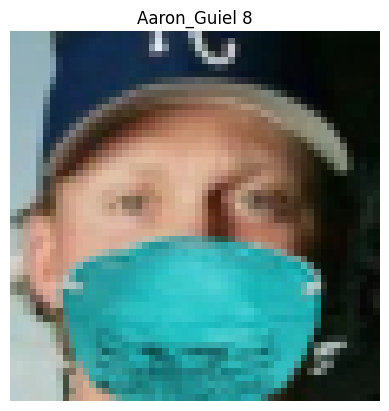

1/1 [==============================] - 1s 867ms/step
Chance of be 0.17641911981627345%
Calvin_Harrison


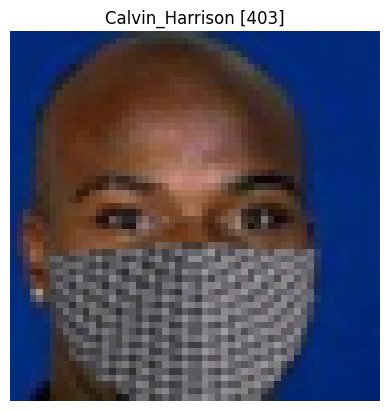

In [18]:
img_number = 8
dir = imgs_paths[img_number]
img = cv2.imread(dir)
plot_prediction(img, dir, img_number, 'n')
get_class(img, classes, classes_n, imgs_paths)